# Load Imports

In [1]:
# python imports
import os
import json
from math import pi

# third-party imports
import matplotlib.pyplot as plt

## Config

In [2]:
NETWORK_NAME = 'Network02'
PREFIX = ''

SAVE_FIG = False
SHOW_TITLE = True

OUTPUT_FIG = 'imgs'

## Globals

In [3]:
SEVERITY_LABELS = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
RISK_LABELS = ['LOW', 'MODERATE', 'IMPORTANT', 'CRITICAL']

COLORS = ['#14943D', '#FDBE0E', '#FC7303', '#F20101']

# Utils

In [4]:
def vulns_per_severity(cvss_dist, risk_dist):
    fig1, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    fig2, ax2 = plt.subplots(1, 1, figsize=(6, 4))

    if SHOW_TITLE:
        fig1.suptitle('Distribution of Vulnerabilities by CVSS')
        fig2.suptitle('Distribution of Vulnerabilities by FRAPE')

    ax1.set_ylabel('Vulnerability Distribution (%)', size=14, horizontalalignment='center')
    ax2.set_ylabel('Vulnerability Distribution (%)', size=14, horizontalalignment='center')
    
    indexes = SEVERITY_LABELS
    values = [cvss_dist[label] for label in SEVERITY_LABELS]

    pps = ax1.bar(indexes, [val / sum(cvss_dist.values()) for val in values], color=COLORS)
    for p, val in zip(pps, values):
        ax1.annotate(val, xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    ax1.xaxis.set_ticks(indexes)
    ax1.set_xticklabels(indexes, rotation=45)
    ax1.grid(True, linestyle='-', alpha=.10)
    
    indexes = RISK_LABELS
    values = [risk_dist[label] for label in RISK_LABELS]
    
    pps = ax2.bar(indexes, [val / sum(risk_dist.values()) for val in values], color=COLORS)
    for p, val in zip(pps, values):
        ax2.annotate(val, xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    ax2.xaxis.set_ticks(indexes)
    ax2.set_xticklabels(indexes, rotation=45)
    ax2.grid(True, linestyle='-', alpha=.10)
    
    if SAVE_FIG:
        fig1.savefig(f'{OUTPUT_FIG}/vulns-dist-cvss.pdf', bbox_inches='tight', dpi=1200)
        fig2.savefig(f'{OUTPUT_FIG}/vulns-dist-frape.pdf', bbox_inches='tight', dpi=1200)

    plt.show()

In [5]:
def assets_per_context(context):
    fig, axes = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True, sharey=True)
    
    if SHOW_TITLE:
        fig.suptitle('Distribution of assets by contextual characteristics', size=14)
    
    fig.supylabel('Distribution of Assets (%)', size=14)
    
    ctx_names_dict = {
        'topology': ('Topology', ['LOCAL', 'DMZ']),
        'asset_type': ('Asset Type', ['WORKSTATION', 'SERVER']),
        'environment': ('Environment', ['DEVELOPMENT', 'PRODUCTION']),
        'sensitive_data': ('Sensitive Data', ['FALSE', 'TRUE']),
        'end_of_life': ('End-of-Life', ['FALSE', 'TRUE']), 
        'critical_asset': ('Critical Assets', ['FALSE', 'TRUE'])
    }
    
    for ax, (key, value) in zip(axes.flatten(), context.items()):
        
        title, xlabels = ctx_names_dict[key]
        
        ax.set_title(title)
        ax.bar(xlabels, [1 - value, value])
        ax.grid(True, linestyle='-', alpha=.10)
    
    if SAVE_FIG:
        plt.savefig(f'{OUTPUT_FIG}/{PREFIX}-assets-ctx.pdf', bbox_inches='tight', dpi=1200)

    plt.show()

In [6]:
def flatten_dict(vulns_dist, keys):
    tmp_list = {key: [] for key in keys}

    for dist in vulns_dist:
        for key, value in dist.items():
            tmp_list[key].append(value)

    tmp_list = {key: round(sum(value) / len(value))  for key, value in tmp_list.items()}
    
    return tmp_list

## Load data

In [7]:
context = dict()

cvss_dist = list()
risk_dist = list()

for file in os.listdir(f'../output/{NETWORK_NAME}/'):
    if file.endswith('.json'):
        with open(f'../output/{NETWORK_NAME}/{file}') as f:
                        
            file = json.load(f)
            
            # loading environment configuration
            
            context = file['network_config']['context']          

            # loading values

            cvss_dist.append(file['stats']['cvss']['base_severity'][0])
            risk_dist.append(file['stats']['cvss']['risk_score'][0])
            
cvss_dist = flatten_dict(cvss_dist, SEVERITY_LABELS)
risk_dist = flatten_dict(risk_dist, RISK_LABELS)

# Run

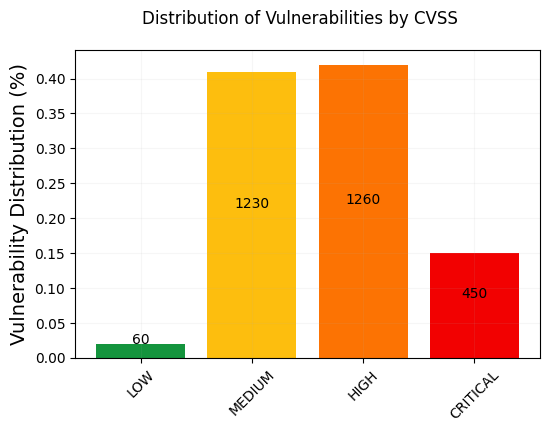

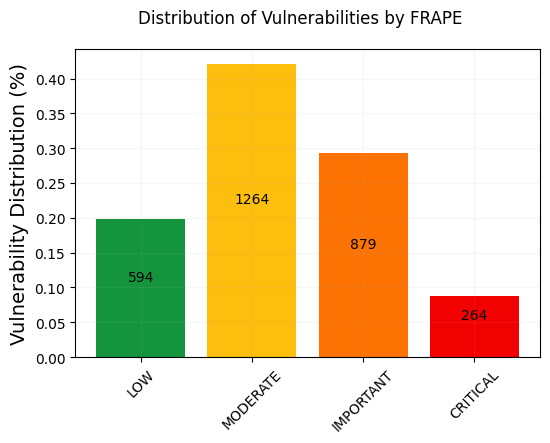

In [8]:
vulns_per_severity(cvss_dist, risk_dist)

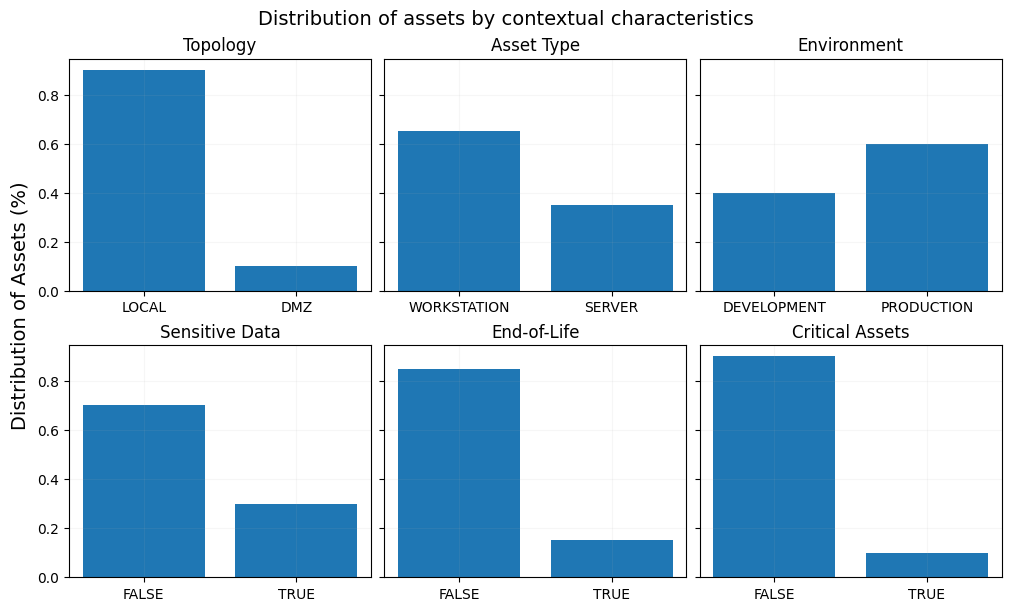

In [9]:
assets_per_context(context)